**Teilaufgabe a) Ausgabe**

In [1]:
import pandas as pd


dfs = pd.read_csv("http://www.statsci.org/data/general/punting.txt", sep="\t")
dfs

,Distance,Hang,R_Strength,L_Strength,R_Flexibility,L_Flexibility,O_Strength
0,162.50,4.75,170,170,106,106,240.57
1,144.00,4.07,140,130,92,93,195.49
2,147.50,4.04,180,170,93,78,152.99
3,163.50,4.18,160,160,103,93,197.09
4,192.00,4.35,170,150,104,93,266.56
5,171.75,4.16,150,150,101,87,260.56
6,162.00,4.43,170,180,108,106,219.25
7,104.93,3.20,110,110,86,92,132.68
8,105.67,3.02,120,110,90,86,130.24
9,117.59,3.64,130,120,85,80,205.88


**Teilaufgabe c) Streuungsdiagramm**

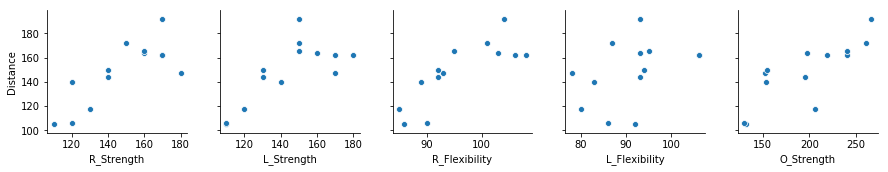

In [9]:
#Teilaufgabe c) Streuungsdiagramm
import seaborn as sns

sns.pairplot(dfs, y_vars=["Distance"], x_vars=["R_Strength", "L_Strength", "R_Flexibility", "L_Flexibility", "O_Strength"])

**Teilaufgabe d) Korrelationskoeffizienten**

In [13]:
print(dfs.corr()['Distance'][2:])

R_Strength       0.791467
L_Strength       0.744030
R_Flexibility    0.806334
L_Flexibility    0.407743
O_Strength       0.796187
Name: Distance, dtype: float64


r steht für Korrelationskoeffizient
Alle Merkmale sind positiv korreliert. D.h. eine Regressionsgrade je Merkmal wäre steigend. 
Je näher der Korrelationskoeffizient an der 1 bzw. an der -1 eines Merkmals ist, desto eher kann anhand eines neuen X-Wertes
der dazugehörige Y-Wert vorhergesagt werden.

Interpretation: 
Primär hängt die Weite eines Punts von der Gesamtbeinstärke der Beine, der Stärke der einzelnen Beine und der Flexibilität des rechten Beines, dem Schussbein, ab. Die Flexibilität des Standbeines, dem Linken, spielt nur eine eher insignifikante Rolle.

**Teilaufgabe e) Korrelationskoeffizienten Vergleich**

In [3]:
import numpy as np

x = dfs.R_Strength[0:3]
y = dfs.Distance[0:3]

print(np.corrcoef(x, y)[0, 1])

0.44400014111142144


**Teilaufgabe f) Bestimmtheitsmaß**

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

data = pd.DataFrame(np.c_[dfs["R_Strength"], dfs["L_Strength"], dfs["R_Flexibility"], dfs["L_Flexibility"], dfs["O_Strength"]])

distance_scaled = StandardScaler().fit_transform(data)
lm = LinearRegression().fit(distance_scaled, dfs['Distance'])

r2_score(dfs['Distance'], lm.predict(distance_scaled))

0.8143749052265045

**Teilaufgabe g) Visualisierung** 


Gewählt wird hier R_Flexibility, da er die beste Korrelation bietet.

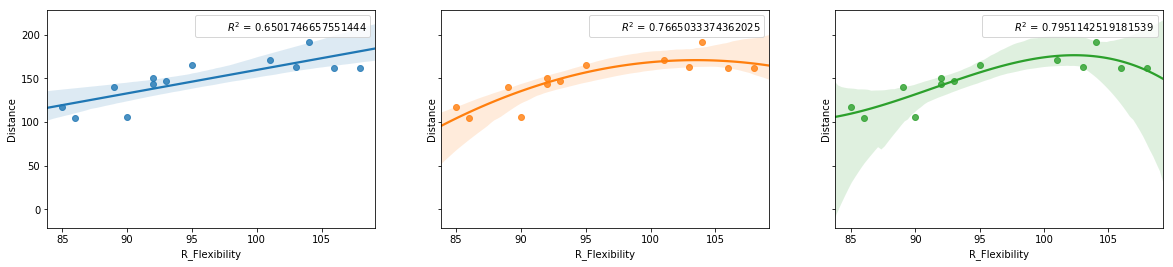

In [11]:
import matplotlib.pyplot as pl, seaborn as sns
f, axs = pl.subplots(ncols=3, figsize=(20, 4), sharey=True)
x = dfs.R_Flexibility
y = dfs.Distance
for order in range(1, 4):
    coefs = np.polyfit(x, y, order) # Regressionskoeffizienten "fitten"
    p = np.poly1d(coefs) # polynomiale Funktion
    r2 = r2_score(y, p(x)) # r² berechnen
    sns.regplot(x, y, order=order, ax=axs[order-1], label="$R^2$ = "+ str(r2)) # Ausgabe
    axs[order-1].legend(markerscale=0)

Anhand der Bestimmtheitsmaße lässt sich hier folgern, dass ein Modell mit einer Funktion 2. Grades ein gutes Modell darstellt. 
Für Funktionen höheren Grades erzielt man nur eine geringfügige Steigerung des Bestimmtheitsmaßes.
Bei einer Funktion ersten Grades ist zu erkennen, dass Punkte die nicht hinzugefügt werden, die es aber grundsätzlich sollten.
Wir sehen hier Underfitting.
Bei einer Funktion 3. Grades sind viele Freiheitsgrade zu erkennen, was Overfitting bedeutet.